# Importando DataSets:

In [1]:
import pandas as pd
import gdown

In [2]:
#Link do Google Drive: https://drive.google.com/file/d/1FCcXtUdhuxSE-6RErpr5tdzPYYNUi4Jc/view?usp=drive_link
url = 'https://drive.google.com/uc?id=1FCcXtUdhuxSE-6RErpr5tdzPYYNUi4Jc'
output = 'abandono_clientes.csv'

In [3]:
#Download do DataSet de treino:
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1FCcXtUdhuxSE-6RErpr5tdzPYYNUi4Jc
To: /content/abandono_clientes.csv
100%|██████████| 685k/685k [00:00<00:00, 10.9MB/s]


'abandono_clientes.csv'

# Análise Exploratória

## Análise Inicial

In [4]:
#Criando um DataFrame a partir do arquivo CSV:
df = pd.read_csv('abandono_clientes.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Verificando balanceamento dos dados:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


O DataFrame está desbalanceado

In [6]:
#Explorando dados nulos, quantidade de colunas e tipagem das colunas:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


1. Não há dados nulos
2. Temos inicialmente 14 colunas
3. Colunas do tipo int, float e object

- RowNumber, CustomerId e Surname não possuem poder preditivo e por isso essas colunas serão removidas.

In [7]:
#Removendo as colunas mencionadas:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Análise e descrição gráfica das variáveis - Resposta 1

In [8]:
var_quant_cont = ['CreditScore', 'Balance', 'EstimatedSalary'] #Variáveis quantitativas contínuas
var_quant_disc = ['Age', 'Tenure', 'NumOfProducts'] #Variáveis quantitativas discretas
var_qual_nominal = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'] #Variáveis qualitativas nominais
var_target = ['Exited'] #Variável target

### Análise variáveis quantitativas contínuas

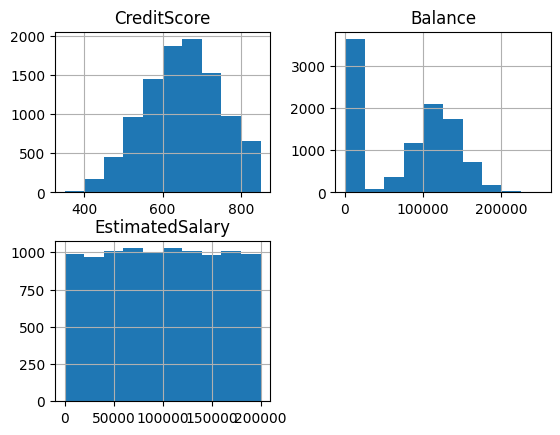

In [9]:
#Histograma
df[var_quant_cont].hist();

1. CreditScore: Possui uma distribuição assimétrica à esquerda. Visualmente, lembra um distribuição normal mas não parece ser normal.
2. Balance: Possui grande quantidade de valores com o número zero e depois possui uma distribuição que visulamente parece ser simétrica.
3. EstimatedSalary: Quantidade de linhas por faixa de EstimatedSalary é equilibrado, cada faixa possue aproximadamente a mesma quantidade de linhas.

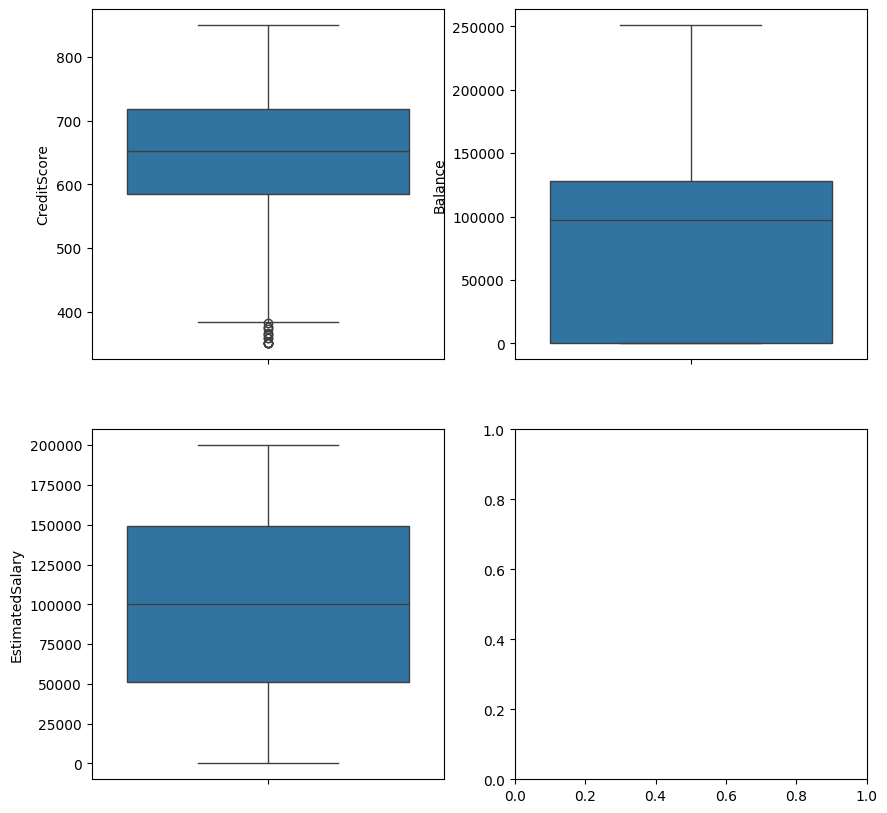

In [10]:
#Boxplots:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2, figsize=(10,10))

plt.subplot(2,2,1)
sns.boxplot(data=df['CreditScore'])

plt.subplot(2,2,2)
sns.boxplot(data=df['Balance'])

plt.subplot(2,2,3)
sns.boxplot(data=df['EstimatedSalary']);

1. CreditScore: Possue alguns outliers inferior.
2. Balance: Não possue outliers.
3. EstimatedSalary: Não possue outliers.

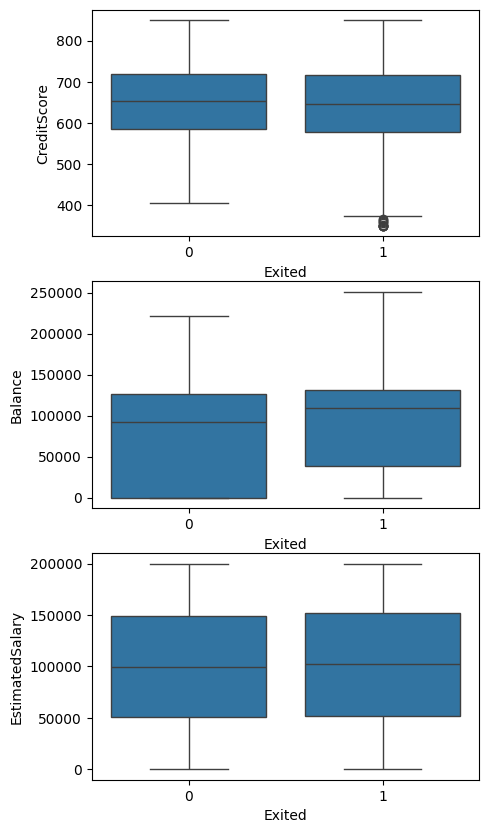

In [11]:
#BoxPlots vs. exited:

fig, ax = plt.subplots(3,1, figsize=(5,10))

plt.subplot(3,1,1)
sns.boxplot(data=df[var_quant_cont+var_target], y='CreditScore', x=var_target[0]);

plt.subplot(3,1,2)
sns.boxplot(data=df[var_quant_cont+var_target], y='Balance', x=var_target[0]);

plt.subplot(3,1,3)
sns.boxplot(data=df[var_quant_cont+var_target], y='EstimatedSalary', x=var_target[0]);

Das três features acima a única que visualmente parece diferenciar os grupos 0 (não sai) e 1 (sai) é o Balance.

In [12]:
#Estatísticas descritivas gerais:
print(df[var_quant_cont].describe())

        CreditScore        Balance  EstimatedSalary
count  10000.000000   10000.000000     10000.000000
mean     650.528800   76485.889288    100090.239881
std       96.653299   62397.405202     57510.492818
min      350.000000       0.000000        11.580000
25%      584.000000       0.000000     51002.110000
50%      652.000000   97198.540000    100193.915000
75%      718.000000  127644.240000    149388.247500
max      850.000000  250898.090000    199992.480000


In [13]:
#Média:
print('Médias das variáveis quantitativas contínuas:\n')
print(round(df[var_quant_cont].mean(),2));

Médias das variáveis quantitativas contínuas:

CreditScore           650.53
Balance             76485.89
EstimatedSalary    100090.24
dtype: float64


In [14]:
#Mediana:
print('Medianas das variáveis quantitativas contínuas:\n')
print(round(df[var_quant_cont].median(),2));

Medianas das variáveis quantitativas contínuas:

CreditScore           652.00
Balance             97198.54
EstimatedSalary    100193.92
dtype: float64


In [15]:
#Moda:
print('Modas das variáveis quantitativas contínuas:\n')
print(round(df[var_quant_cont].mode(),2));

Modas das variáveis quantitativas contínuas:

   CreditScore  Balance  EstimatedSalary
0          850      0.0         24924.92


In [16]:
#Desvio padrão:
print('Desvio padrão das variáveis quantitativas contínuas:\n')
print(round(df[var_quant_cont].std(),2));

Desvio padrão das variáveis quantitativas contínuas:

CreditScore           96.65
Balance            62397.41
EstimatedSalary    57510.49
dtype: float64


In [17]:
#Skew:
print('Skew das variáveis quantitativas contínuas:\n')
print(round(df[var_quant_cont].skew(),2));

Skew das variáveis quantitativas contínuas:

CreditScore       -0.07
Balance           -0.14
EstimatedSalary    0.00
dtype: float64


In [18]:
#Coeficiente de variação:
print('Coeficiente de variação das variáveis quantitativas contínuas:\n')
print(round(df[var_quant_cont].std()/df[var_quant_cont].mean(),2));

Coeficiente de variação das variáveis quantitativas contínuas:

CreditScore        0.15
Balance            0.82
EstimatedSalary    0.57
dtype: float64


As estatísticas descritivas utilizadas para as variáveis quantitativas contínuas foram escolhidas para que fosse possível entender alguns pontos como:
1. Distribuição dos dados
2. Proximidade dos dados á uma distribuição normal
3. Identificação de Outliers - É necessário pois possuem impacto negativo em alguns modelos de regressão como a regressão logística
4. Variáveis com baixa variância

obs: Média e mediana podem ser utilizadas para tratar dados faltantes

###Análise variáveis quantitativas discretas

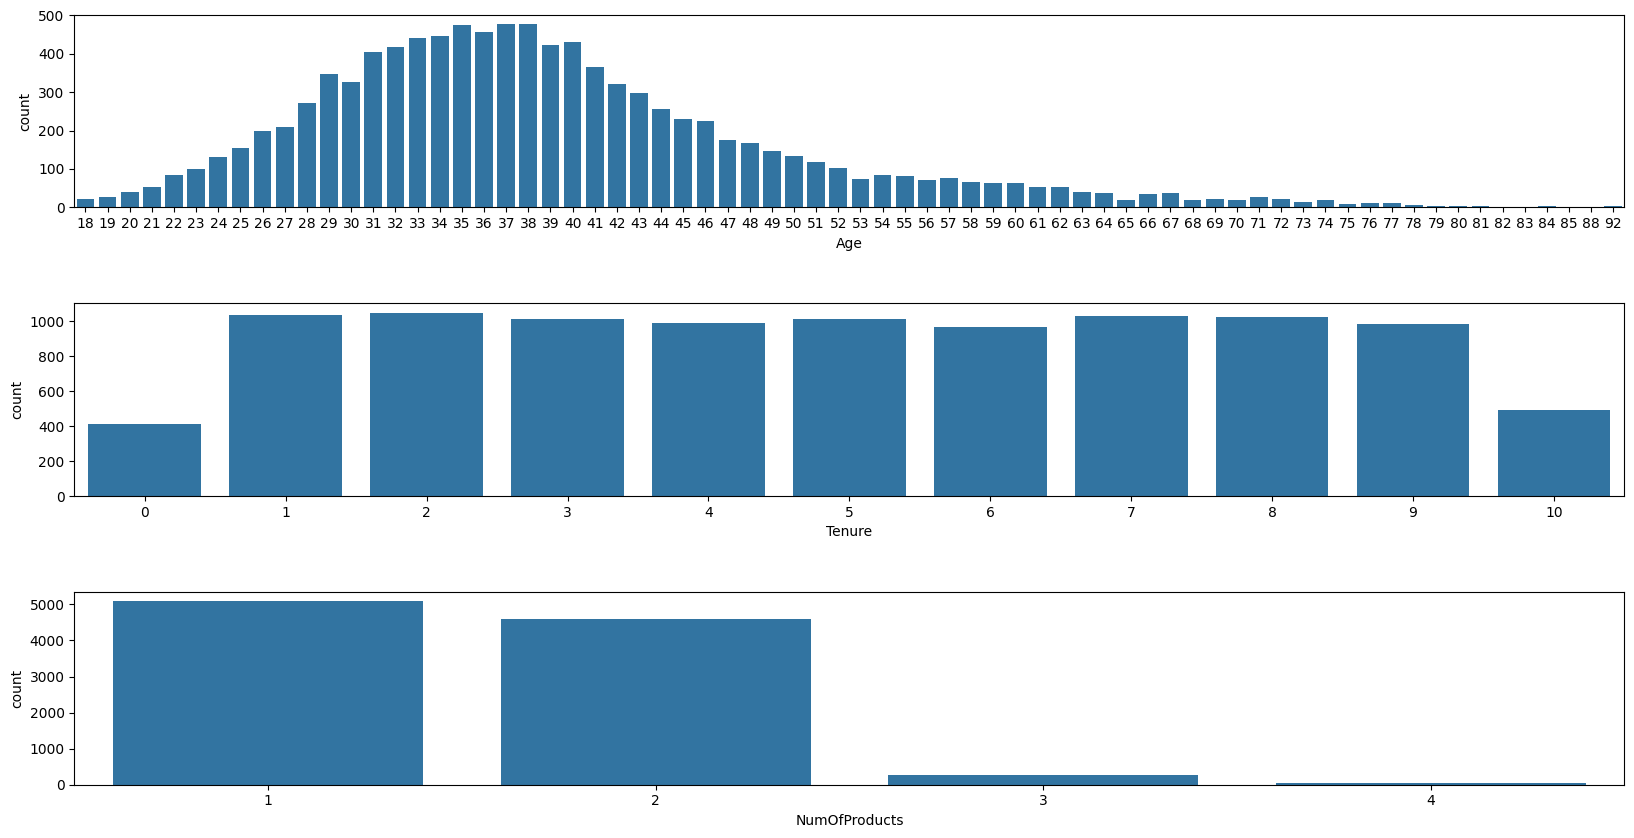

In [19]:
#Gráficos de barra/frequência:

fig, ax = plt.subplots(3,1, figsize=(20,10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(3,1,1)
sns.countplot(df, x='Age')

plt.subplot(3,1,2)
sns.countplot(df, x='Tenure')

plt.subplot(3,1,3)
sns.countplot(df, x='NumOfProducts');

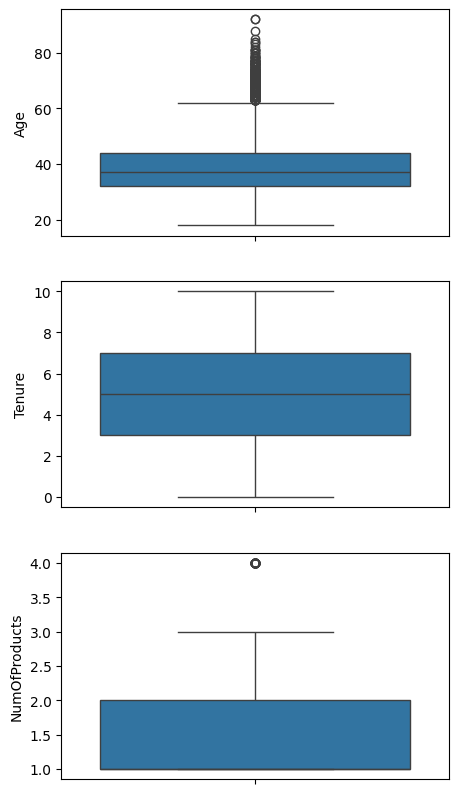

In [20]:
#BoxPlots:
fig, ax = plt.subplots(3,1, figsize=(5,10))

plt.subplot(3,1,1)
sns.boxplot(data=df['Age'])

plt.subplot(3,1,2)
sns.boxplot(data=df['Tenure'])

plt.subplot(3,1,3)
sns.boxplot(data=df['NumOfProducts']);

In [21]:
#Moda
print(df[var_quant_disc].mode())

   Age  Tenure  NumOfProducts
0   37       2              1


As estatísticas descritivas utilizadas para as variáveis quantitativas discretas foram escolhidas para que fosse possível entender alguns pontos como:
1. Identificar tendências

Obs.: Moda pode ser utilizada para tratar dados faltantes.

###Análise variáveis qualitativas nominais

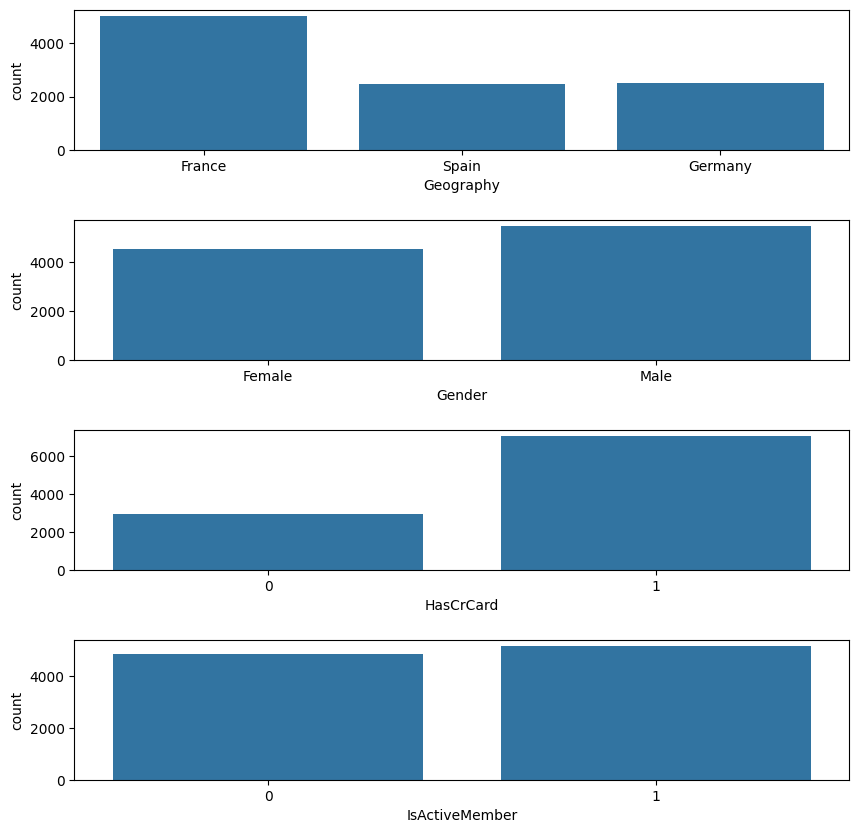

In [22]:
fig, ax = plt.subplots(4,1, figsize=(10,10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(4,1,1)
sns.countplot(df, x='Geography')

plt.subplot(4,1,2)
sns.countplot(df, x='Gender')

plt.subplot(4,1,3)
sns.countplot(df, x='HasCrCard')

plt.subplot(4,1,4)
sns.countplot(df, x='IsActiveMember');

In [23]:
#Moda:
print(df[var_qual_nominal].mode())

  Geography Gender  HasCrCard  IsActiveMember
0    France   Male          1               1


As estatísticas descritivas utilizadas para as variáveis qualitativas nominais foram escolhidas para que fosse possível entender alguns pontos como:
1. Identificar tendências
2. Comparação entre grupos
3. Identificar desequilíbrios

Obs.: Moda pode ser utilizada para tratar dados faltantes.

## Correlação variáveis vs variável target

###Variáveis quantitativas contínuas e discretas

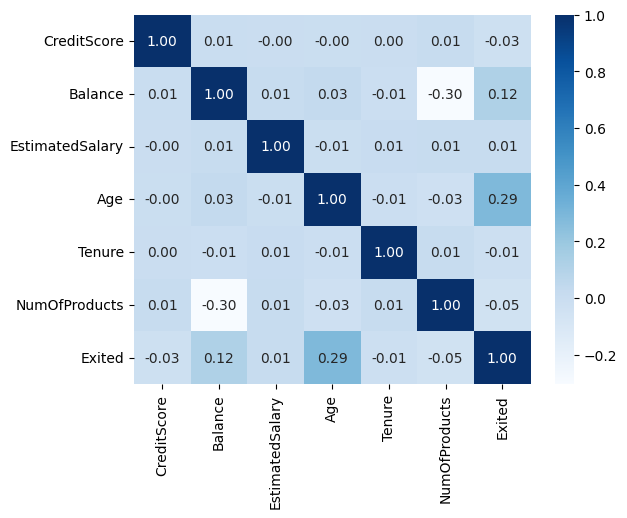

In [24]:
#Variáveis quantitativas contínuas e discretas:
correlation = df[var_quant_cont+var_quant_disc+var_target].corr()
sns.heatmap(correlation, annot=True, cmap='Blues', fmt='.2f');

obs.:
1. As variáveis quantitativas não possuem correlação linear forte com a variável target.
2. Para utilizarmos regressão logística e melhorar o desempenho do modelo precisaremos transformar essas variáveis em variáveis categóricas ou experimentar outros algoritmos como os baseados em árvores de decisão.

#### Verificando associação da nova feature transformada de quantitativa em categórica

In [25]:
import numpy as np

In [26]:
def chi_quadrado_fx(var):
  '''
  Essa função irá realizar o teste chi_quadrado para verificar a associação entra a variável target e a variável quantitativa.
  A variável quantitativa será transformada em variável categórica.
  '''

  from scipy.stats import chi2_contingency

  #Criando os quartis:
  minimo = min(df[var])
  Q1 = np.percentile(df[var], 25)
  Q2 = np.percentile(df[var], 50)
  Q3 = np.percentile(df[var], 75)
  maximo = max(df[var])

  #Criando as faixas de Scoring:
  df.loc[(df[var] >= minimo) & (df[var] <= Q1), f'fx_{var}'] = f'{minimo} a {Q1}' #fx significa faixa, ou seja, faixa de valor 1
  df.loc[(df[var] > Q1) & (df[var] <= Q2), f'fx_{var}'] = f'{Q1} a {Q2}' #fx significa faixa, ou seja, faixa de valor 2
  df.loc[(df[var] > Q2) & (df[var] <= Q3), f'fx_{var}'] = f'{Q2} a {Q3}' #fx significa faixa, ou seja, faixa de valor 3
  df.loc[(df[var] > Q3) & (df[var] <= maximo), f'fx_{var}'] = f'{Q3} a {maximo}' #fx significa faixa, ou seja, faixa de valor 4

  #Tabela de frequências:
  cross_tab = pd.crosstab(index=df[f'fx_{var}'], columns=df[var_target[0]], margins=True, normalize=True)
  cross_tab = pd.crosstab(index=df[f'fx_{var}'], columns=df[var_target[0]], margins=True)

  #Teste Qui-Quadrado:
  stat, p, dof, expected = chi2_contingency(cross_tab)

  #definindo significancia:
  significancia = 0.05

  if p <= significancia:
    print(f'Para variável {var} ---> p_value={p} <= {significancia}. Rejeita H0: Aceita H1: As variáveis são dependentes.')
    print('Há correlação!\n')

  else:
    print(f'Para variável {var} ---> p_value={p} > {significancia}. Não rejeita H0: Aceita H0: As variáveis são independentes.')
    print('Não há correlação!\n')

  df.drop(columns=[f'fx_{var}'], inplace=True)

In [27]:
#CreditScore:
chi_quadrado_fx('CreditScore')

Para variável CreditScore ---> p_value=0.1556380220109247 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!



In [28]:
#Balance:
chi_quadrado_fx('Balance')

Para variável Balance ---> p_value=7.125256034303064e-32 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



In [29]:
#EstimatedSalary:
chi_quadrado_fx('EstimatedSalary')

Para variável EstimatedSalary ---> p_value=0.9349438220047909 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!



In [30]:
#Age:
chi_quadrado_fx('Age')

Para variável Age ---> p_value=8.737541260676523e-266 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



In [31]:
#Tenure:
chi_quadrado_fx('Tenure')

Para variável Tenure ---> p_value=0.778962007578959 > 0.05. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!



In [32]:
#NumOfProducts:
chi_quadrado_fx('NumOfProducts')

Para variável NumOfProducts ---> p_value=0.0 <= 0.05. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



Feature Selection:

Pode-se concluir que as variáveis quantitativas que ao serem transformadas em categóricas possuem associação com a variável target são: 'Balance', 'Age', 'NumOfProduct'

###Variáveis qualitativas nominais

In [33]:
def chi_quadrado(var_qual):
  '''
  Essa função irá realizar o teste chi_quadrado para verificar a associação entra a variável target e a variável categórica passada.
  '''

  from scipy.stats import chi2_contingency

  #Definindo significância:
  significancia = 0.05

  #Teste chi-quadrado:
  cross_tab_qual_prop = pd.crosstab(index=df['Exited'], columns=df[var_qual], normalize='index', margins=True)
  cross_tab_qual = pd.crosstab(index=df['Exited'], columns=df[var_qual], margins=True)
  stat, p, dof, expected = chi2_contingency(cross_tab_qual)

  #Resultado teste:
  print(f'Resultado teste Qui-Quadrado:')
  if p <= significancia:
    print(f'p_value={p} é menor que significância. Rejeita H0: Aceita H1: As variáveis são dependentes.')
    print('Há correlação!\n')

  else:
    print(f'p_value={p} é maior que significância. Não rejeita H0: Aceita H0: As variáveis são independentes.')
    print('Não há correlação!\n')
    df.drop(columns=[var_qual], inplace=True)

In [34]:
#Geography:
chi_quadrado('Geography')

Resultado teste Qui-Quadrado:
p_value=4.403323510401778e-62 é menor que significância. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



In [35]:
#Gender:
chi_quadrado('Gender')

Resultado teste Qui-Quadrado:
p_value=1.3372156100276913e-23 é menor que significância. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



In [36]:
#HasCrCard:
chi_quadrado('HasCrCard')

Resultado teste Qui-Quadrado:
p_value=0.9725718607356297 é maior que significância. Não rejeita H0: Aceita H0: As variáveis são independentes.
Não há correlação!



In [37]:
#IsActiveMember:
chi_quadrado('IsActiveMember')

Resultado teste Qui-Quadrado:
p_value=1.4374250569429126e-51 é menor que significância. Rejeita H0: Aceita H1: As variáveis são dependentes.
Há correlação!



Feature Selection:

Pode-se concluir que as variáveis qualitativas que possuem associação com a variável target são: 'Geography', 'Gender' e 'IsActiveMember'

In [38]:
selected_features = ['Balance', 'Age', 'NumOfProducts', 'Geography', 'Gender', 'IsActiveMember']

#Resposta 2

-A previsão de churn de clientes pode ser realizada através de modelo de Machine Learning.

-As variáveis utilizadas foram: 'Balance', 'Age', 'NumOfProducts', 'Geography', 'Gender', 'IsActiveMember'. Elas foram escolhidas seguindo o teste estatístico chi-quadrado que testa se elas possuem associação ou não com a variável target. As variáveis quantitativas foram transformadas em categóricas antes de aplicar o teste.

-Todas as variáveis escolhidas necessitaram de transformações.
  1. As variáveis 'Balance', 'Age' e 'NumOfProducts' foram transformadas em variáveis categóricas (separadas por quartis) porque não apresentavam correlação linear com a variável target.
  2. As variáveis 'Geography', 'Gender', 'IsActiveMember' foram transformadas em suas dummies através do OneHotEncoder. Isso porque modelos de Machine Learning só entendem números, não palavras.

-Estamos lidando com um problema de classificação.

-Considerando a medida de performance 'Recall', pois o objetivo é identificar o máximo de clientes que irão sair, o modelo que melhor se aproxima dos dados foi o de regressão logística.

-Prós:
  1. Fácil interpretabilidade.
  2. Eficiência computacional.

-Contras:
  1. Sensível a Outliers.
  2. Necessidade de balanceamento.
  3. Limitações a linearidade.

#Análise multicolinearidade

In [39]:
df_multi = df[selected_features].copy()

In [40]:
def transformar_quant_em_qual(var, df_):
  '''
  Essa função irá transformar as variáveis quantitativas em categóricas.
  '''
  from scipy.stats import chi2_contingency
  #Criando os quartis:
  minimo = min(df_[var])
  Q1 = np.percentile(df_[var], 25)
  Q2 = np.percentile(df_[var], 50)
  Q3 = np.percentile(df_[var], 75)
  maximo = max(df_[var])

  #Criando as faixas de Scoring:
  df_.loc[(df_[var] >= minimo) & (df_[var] <= Q1), f'fx_{var}'] = f'1' #fx significa faixa, ou seja, faixa de valor 1
  df_.loc[(df_[var] > Q1) & (df_[var] <= Q2), f'fx_{var}'] = f'2' #fx significa faixa, ou seja, faixa de valor 2
  df_.loc[(df_[var] > Q2) & (df_[var] <= Q3), f'fx_{var}'] = f'3' #fx significa faixa, ou seja, faixa de valor 3
  df_.loc[(df_[var] > Q3) & (df_[var] <= maximo), f'fx_{var}'] = f'4' #fx significa faixa, ou seja, faixa de valor 4

  df_.drop(columns=[var], inplace=True)

  return df_

In [41]:
#Chamando a função:
df_multi = transformar_quant_em_qual('Balance', df_multi)
df_multi = transformar_quant_em_qual('Age', df_multi)
df_multi = transformar_quant_em_qual('NumOfProducts', df_multi)

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
df_multi = hot_encoder.fit_transform(df_multi)
df_multi = pd.DataFrame(df_multi, columns=hot_encoder.get_feature_names_out())
df_multi.head()

,Geography_Germany,Geography_Spain,Gender_Male,IsActiveMember_1,fx_Balance_2,fx_Balance_3,fx_Balance_4,fx_Age_2,fx_Age_3,fx_Age_4,fx_NumOfProducts_3,fx_NumOfProducts_4
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


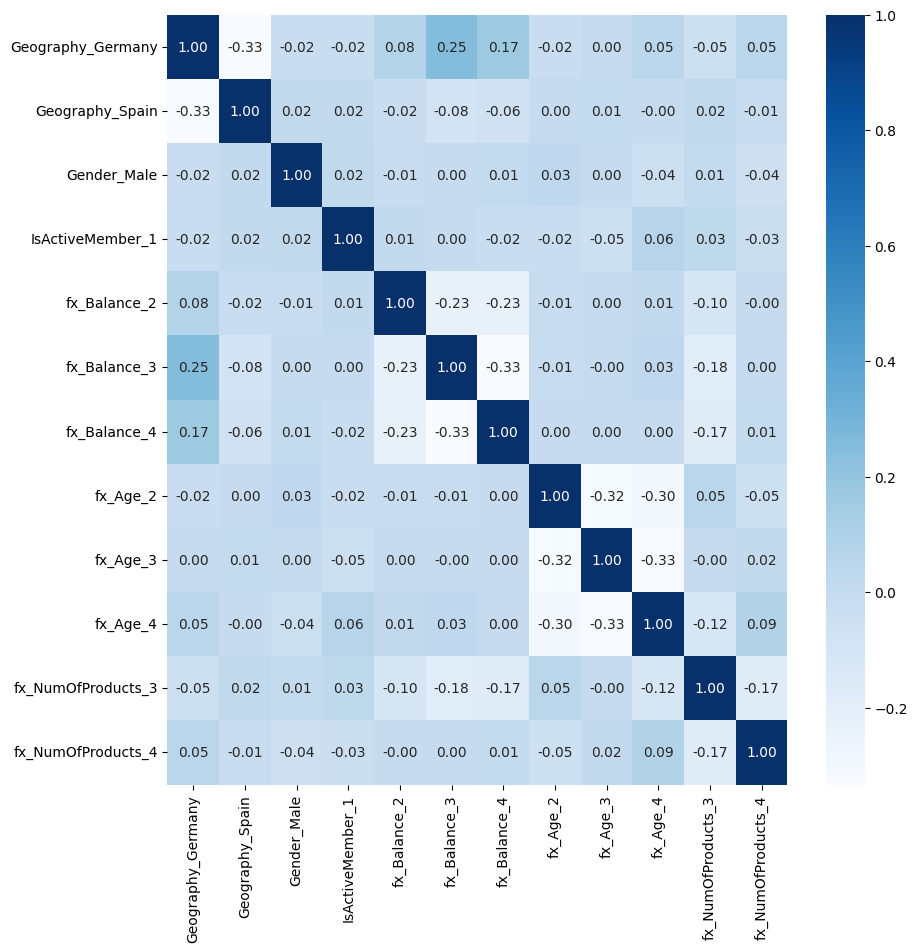

In [44]:
#Correlações Pearson:
correlation_encoded = df_multi.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_encoded, annot=True, cmap='Blues', fmt='.2f');

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
#VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Adiciona constante e calcula VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = df_multi.columns
vif_data["VIF"] = [variance_inflation_factor(df_multi.values, i) for i in range(df_multi.shape[1])]

print(vif_data)

              Variable       VIF
0    Geography_Germany  1.880697
1      Geography_Spain  1.419255
2          Gender_Male  1.982786
3     IsActiveMember_1  1.907023
4         fx_Balance_2  1.388389
5         fx_Balance_3  1.857183
6         fx_Balance_4  1.755162
7             fx_Age_2  1.559121
8             fx_Age_3  1.607538
9             fx_Age_4  1.570323
10  fx_NumOfProducts_3  1.737529
11  fx_NumOfProducts_4  1.062183


Todas as variáveis possuem valor de VIF abaixo de 5, indicando que não há multicolinearidade

#Separando conjunto de treino e teste

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
df = df[selected_features+var_target]

In [49]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train.head()

,Balance,Age,NumOfProducts,Geography,Gender,IsActiveMember
9254,0.00,32,2,France,Male,1
1561,119624.60,42,2,Germany,Male,1
1670,114739.92,24,1,Spain,Male,0
6087,135637.00,27,1,France,Female,0
6669,142147.32,56,1,France,Male,0


In [52]:
X_test.head()

,Balance,Age,NumOfProducts,Geography,Gender,IsActiveMember
6252,96709.07,32,2,Germany,Male,0
4684,0.00,43,2,France,Male,1
1731,0.00,44,2,Spain,Female,0
4742,119152.10,59,2,Germany,Male,1
4521,124995.98,27,1,Spain,Female,1


#Modelo Regressão Logística

Como explicado anteriormente, como as features não possuem correlação linear com a variável target, uma estratégia para contornar essa situação seria transformar as variáveis quantitativas em categóricas.

##Pipeline

###Pré processamento

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
#OneHotEncoder:
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

A transformação OneHotEncoder é necessária pois um modelo de Machine Learning só entende de números, palavras não entende. O OneHotEncoder criará uma coluna para cada valor da feature e inputará 1 na coluna do valor correspondente em uma determinada linha. Assim o modelo entenderá os padrões existentes nos dados.

### Balanceamento dos dados

In [55]:
pip install imbalanced-learn

In [56]:
from imblearn.under_sampling import NearMiss

Balanceamento dos dados é importante para modelos lineares. Para os modelos baseados em árvores não tiveram tanto impacto no desempenho para este caso.

###Modelo

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logistic = LogisticRegression()

###Pipe

In [60]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import RobustScaler

In [61]:
class QuantitativeToQualitative():
  '''
  Essa classe irá transformar as variáveis quantitativas em categóricas.
  '''
  def __init__(self, variables):
    '''
    Método construtor da classe.

    Parâmetros:
    variables: lista com as variáveis quantitativas que serão transformadas em categóricas. Parâmetro inserido ao instanciar um objeto da classe.
    '''

    self.variables = variables

  def fit(self, X, y=None):
    '''
    Método fit da classe.

    Parâmetros:
    X: conjunto de dados.
    y: variável target.
    '''

    from scipy.stats import chi2_contingency
    import numpy as np

    self.quantiles = {}
    for var in self.variables: #Essa parte irá calcular os quartis de cada variável
      self.quantiles[var] = {
          'min': X[var].min(),
          'Q1': np.percentile(X[var], 25),
          'Q2': np.percentile(X[var], 50),
          'Q3': np.percentile(X[var], 75),
          'max': X[var].max()
      }
    return self

  def transform(self, X, y=None):
    '''
    Método transform da classe.

    Parâmetros:
    X: conjunto de dados.
    y: variável target.
    '''


    X = X.copy()
    for var in self.variables: #Essa parte irá criar substituir os valores pela faixa de valores a qual pertece o valor.
      quantiles = self.quantiles[var]

      X.loc[(X[var] >= quantiles['min']) & (X[var] <= quantiles['Q1']), f'fx_{var}'] = '1'
      X.loc[(X[var] > quantiles['Q1']) & (X[var] <= quantiles['Q2']), f'fx_{var}'] = '2'
      X.loc[(X[var] > quantiles['Q2']) & (X[var] <= quantiles['Q3']), f'fx_{var}'] = '3'
      X.loc[(X[var] > quantiles['Q3']) & (X[var] <= quantiles['max']), f'fx_{var}'] = '4'

      X.drop(columns=[var], inplace=True)

    return X

In [62]:
from imblearn.pipeline import Pipeline

In [63]:
pipe_log = Pipeline([
    ('Transform_quant_to_cat', QuantitativeToQualitative(variables=['Balance', 'Age', 'NumOfProducts'])),
    ('OneHotEncoder', encoder),
    ('Balanceamento', NearMiss()),
    ('LogisticRegression', logistic)
])

## Treino

In [64]:
pipe_log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Pipeline(steps=[('Transform_quant_to_cat',
                 <__main__.QuantitativeToQualitative object at 0x7ce02ac12500>),
                ('OneHotEncoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse_output=False)),
                ('Balanceamento', NearMiss()),
                ('LogisticRegression', LogisticRegression())])

## Validação desempenho

In [65]:
def print_metrics(pipe):
  '''
  Essa função irá imprimir métricas e ferramentas para análise de desempenho do modelo.

  Parâmetros:
  pipe: pipeline do modelo.
  '''
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay, roc_auc_score, roc_curve, recall_score
  from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict, StratifiedKFold

  #Estratificação:
  skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

  #Validação cruzada:
  cv_results = cross_validate(pipe, X_train, y_train, cv=skf, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])
  y_pred = cross_val_predict(pipe, X_train, y_train, cv=skf, method='predict')
  y_pred_proba = cross_val_predict(pipe, X_train, y_train, cv=skf, method='predict_proba')

  #Resultados validação cruzada:
  print(f'\nIntervalos de confiança:\n')
  for i in ['test_accuracy', 'test_precision', 'test_recall', 'test_roc_auc']:
    desv = cv_results[i].std()
    media = cv_results[i].mean()
    print(f'Intervalo de confiança {i}: [{(media - 2*desv)}, {(min(media + 2*desv,1))}]')

  #Matriz de confusão:
  print(f'\nMatriz de confusão:\n')
  disp=ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred))
  disp.plot()
  plt.show()

  #Recall:
  print(f'\nRecall: {round(recall_score(y_train, y_pred.round()), 2)*100}%')

  #Classification report:
  print(f'\nClassification report:\n')
  print(f'\n{classification_report(y_train, y_pred.round())}')

  #Curva ROC:
  print('\nCurva ROC:\n')
  y_pred_proba = pd.DataFrame(y_pred_proba)
  y_pred_proba = y_pred_proba.loc[:,1]

  fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)
  plt.plot(fpr, tpr)
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall)')
  plt.title(f'Curva ROC {round(roc_auc_score(y_train, y_pred_proba),2)*100}%')
  plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida


Intervalos de confiança:

Intervalo de confiança test_accuracy: [0.7362888984675402, 0.7792108988664952]
Intervalo de confiança test_precision: [0.4071717698902357, 0.4699129518289779]
Intervalo de confiança test_recall: [0.610781779257288, 0.6495588533461183]
Intervalo de confiança test_roc_auc: [0.7605325027242451, 0.8081867468606516]

Matriz de confusão:



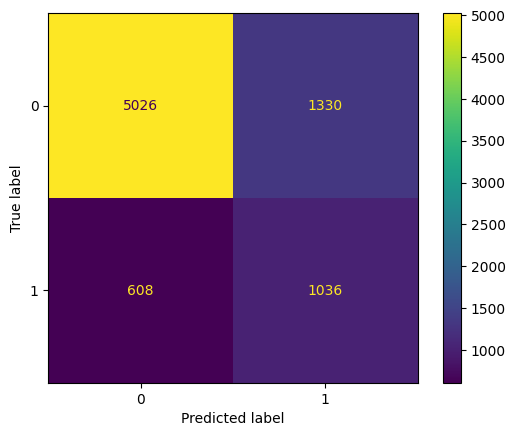


Recall: 63.0%

Classification report:


              precision    recall  f1-score   support

           0       0.89      0.79      0.84      6356
           1       0.44      0.63      0.52      1644

    accuracy                           0.76      8000
   macro avg       0.66      0.71      0.68      8000
weighted avg       0.80      0.76      0.77      8000


Curva ROC:



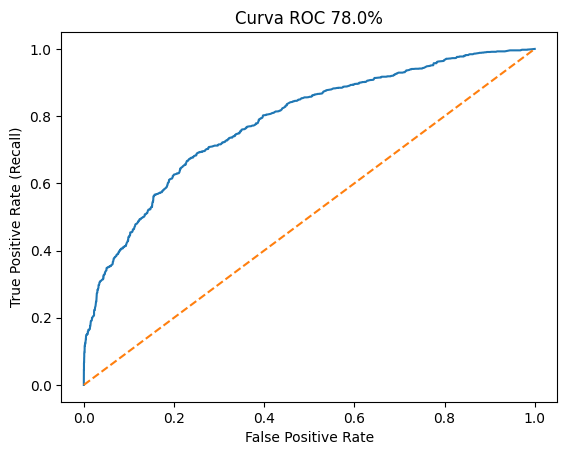

In [66]:
print_metrics(pipe_log);

1. A principal métrica de desempenho para esse modelo seria o Recall pois o objetivo é encontrar os clientes que irão sair sem deixar passar nenhum.

##GridSearch

In [67]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [68]:
params_log = {
    'LogisticRegression__C': [0.0001, 0.001, 0.01, 0.1],
    'LogisticRegression__solver': ['lbfgs', 'newton-cholesky', 'sag', 'saga']
}

In [69]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [70]:
gs_log = GridSearchCV(pipe_log, params_log, cv=skf, scoring='recall', refit=True, n_jobs=-1)

In [71]:
gs_log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('Transform_quant_to_cat',
                                        <__main__.QuantitativeToQualitative object at 0x7ce02ac12500>),
                                       ('OneHotEncoder',
                                        OneHotEncoder(drop='first',
                                                      handle_unknown='ignore',
                                                      sparse_output=False)),
                                       ('Balanceamento', NearMiss()),
                                       ('LogisticRegression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'LogisticRegression__C': [0.0001, 0.001, 0.01, 0.1],
                         'LogisticRegression__solver': ['lbfgs',
                                                        'newton-cholesky',
                                                        'sag', 'saga']},
             scoring='recall')

In [72]:
gs_log.best_params_

{'LogisticRegression__C': 0.1, 'LogisticRegression__solver': 'lbfgs'}

In [73]:
gs_log.best_score_

0.6453771289537712

##Validação desempenho GridSearch

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida


Intervalos de confiança:

Intervalo de confiança test_accuracy: [0.7391945288804126, 0.776805862293496]
Intervalo de confiança test_precision: [0.4141873590858988, 0.4659694429328907]
Intervalo de confiança test_recall: [0.6172120756623108, 0.6735421822452315]
Intervalo de confiança test_roc_auc: [0.7647702946631568, 0.8085908604364332]

Matriz de confusão:



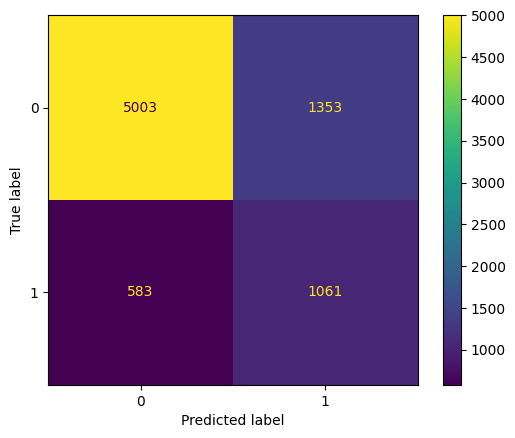


Recall: 65.0%

Classification report:


              precision    recall  f1-score   support

           0       0.90      0.79      0.84      6356
           1       0.44      0.65      0.52      1644

    accuracy                           0.76      8000
   macro avg       0.67      0.72      0.68      8000
weighted avg       0.80      0.76      0.77      8000


Curva ROC:



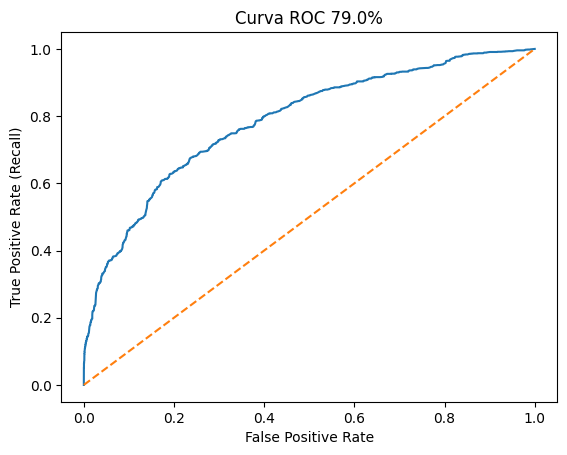

In [74]:
print_metrics(gs_log.best_estimator_)

##Conjunto de teste

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

In [76]:
y_pred = gs_log.predict(X_test)

Text(0.5, 23.52222222222222, 'Predicted label')

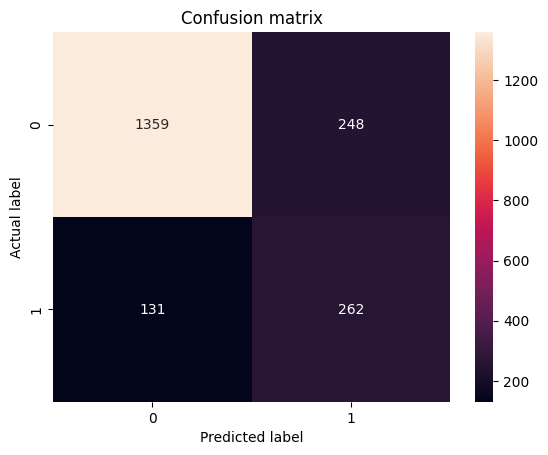

In [77]:
confusion = confusion_matrix(y_test, y_pred.round())
sns.heatmap(confusion, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [78]:
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1607
           1       0.51      0.67      0.58       393

    accuracy                           0.81      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.83      0.81      0.82      2000



#Modelo RandomForest

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.compose import make_column_transformer

In [80]:
X_train_rf = X_train.copy()
X_test_rf = X_test.copy()

In [81]:
X_train_rf.head()

,Balance,Age,NumOfProducts,Geography,Gender,IsActiveMember
9254,0.00,32,2,France,Male,1
1561,119624.60,42,2,Germany,Male,1
1670,114739.92,24,1,Spain,Male,0
6087,135637.00,27,1,France,Female,0
6669,142147.32,56,1,France,Male,0


##Pré processamento

In [82]:
#OneHotEncoder:
transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), ['Geography', 'Gender', 'IsActiveMember']),
    remainder='passthrough',
    sparse_threshold=0
)

#RobustScaler
scaler = RobustScaler(with_centering=False)

##Pipeline

In [83]:
from sklearn.utils.class_weight import compute_class_weight

In [84]:
#Calcula os pesos das classes para anular o impacto negativo do desbalanceamento:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [85]:
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

In [86]:
pipe_rf = Pipeline([
    ('OneHotEncoder_transformer', transformer),
    ('RobustScaler', scaler),
    ('RandomForest', RandomForestClassifier(class_weight=class_weight_dict))
])

##Treino

In [87]:
pipe_rf.fit(X_train_rf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('OneHotEncoder_transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Geography', 'Gender',
                                                   'IsActiveMember'])])),
                ('RobustScaler', RobustScaler(with_centering=False)),
                ('RandomForest',
                 RandomForestClassifier(class_weight={0: 0.6293266205160478,
                                                      1: 2.4330900243309004}))])

##Validação desempenho


Intervalos de confiança:

Intervalo de confiança test_accuracy: [0.8258877296772174, 0.8366118847276964]
Intervalo de confiança test_precision: [0.587097352579355, 0.6235007570431288]
Intervalo de confiança test_recall: [0.4959889798773986, 0.5332081004145723]
Intervalo de confiança test_roc_auc: [0.8097644216681682, 0.8206327877778216]

Matriz de confusão:



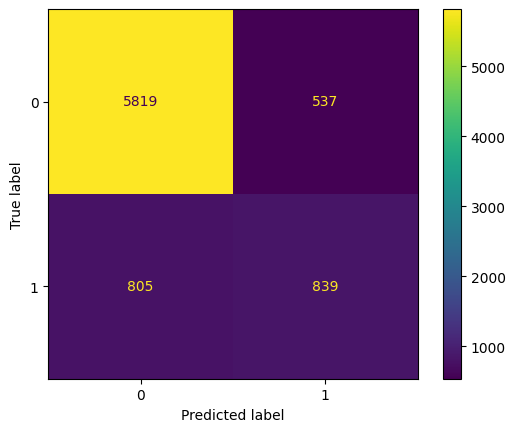


Recall: 51.0%

Classification report:


              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6356
           1       0.61      0.51      0.56      1644

    accuracy                           0.83      8000
   macro avg       0.74      0.71      0.73      8000
weighted avg       0.82      0.83      0.83      8000


Curva ROC:



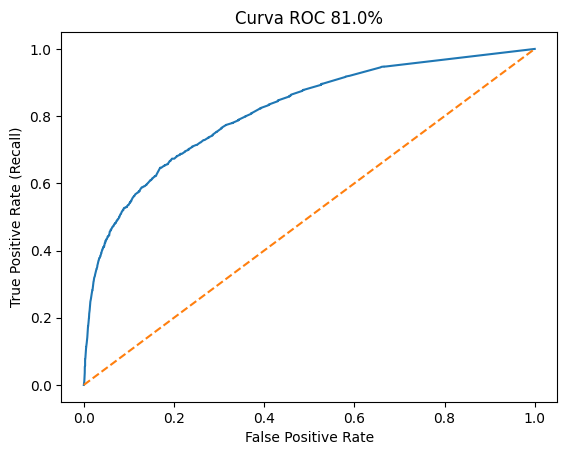

In [88]:
print_metrics(pipe_rf)

##GridSearch

In [89]:
#Paramêtros para GridSearch:
params_rf = {
    'RandomForest__n_estimators': [100, 120, 140],
    'RandomForest__max_depth': [6, 8, 10],
    'RandomForest__min_samples_leaf': [2, 4, 6]
}

In [90]:
#GridSearch para otimização de hiperparâmetros:
gs_rf = GridSearchCV(pipe_rf, params_rf, cv=skf, scoring='recall', refit=True, n_jobs=-1)

In [91]:
gs_rf.fit(X_train_rf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('OneHotEncoder_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Geography',
                                                                          'Gender',
                                                                          'IsActiveMember'])])),
                                       ('RobustScaler',
                                        RobustScaler(with_centering=False)),
                                       ('RandomForest',
                                        RandomForestClassifier(class_weight={0: 0.6293266205160478,
                                                                             1: 2.4330900243309004}))]),
             n_jobs=-1,
             param_grid={'RandomForest__max_depth': [6, 8, 10],
                         'RandomForest__min_samples_leaf': [2, 4, 6],
                         'RandomForest__n_estimators': [100, 120, 140]},
             scoring='recall')

In [92]:
gs_rf.best_params_

{'RandomForest__max_depth': 6,
 'RandomForest__min_samples_leaf': 4,
 'RandomForest__n_estimators': 100}

In [93]:
gs_rf.best_score_

0.734184914841849

##Validação desempenho GridSearch


Intervalos de confiança:

Intervalo de confiança test_accuracy: [0.7980472826926703, 0.8142031739972426]
Intervalo de confiança test_precision: [0.505966810888904, 0.5351600740747268]
Intervalo de confiança test_recall: [0.6974776982961886, 0.7380454160590426]
Intervalo de confiança test_roc_auc: [0.8470762599328049, 0.8745980830339452]

Matriz de confusão:



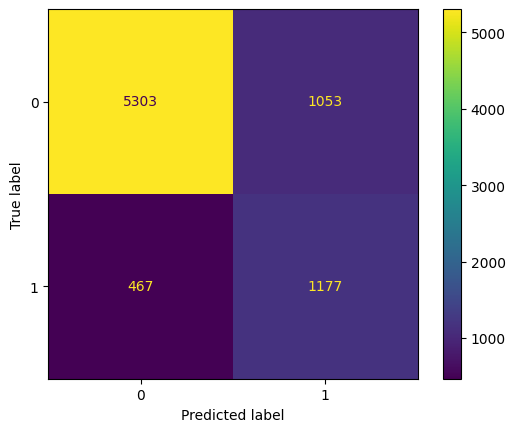


Recall: 72.0%

Classification report:


              precision    recall  f1-score   support

           0       0.92      0.83      0.87      6356
           1       0.53      0.72      0.61      1644

    accuracy                           0.81      8000
   macro avg       0.72      0.78      0.74      8000
weighted avg       0.84      0.81      0.82      8000


Curva ROC:



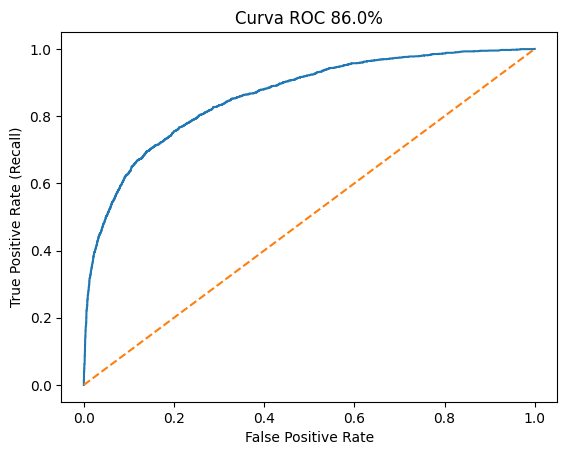

In [94]:
print_metrics(gs_rf.best_estimator_)

##Conjunto de teste

In [95]:
y_pred_rf = gs_rf.predict(X_test_rf)

Text(0.5, 23.52222222222222, 'Predicted label')

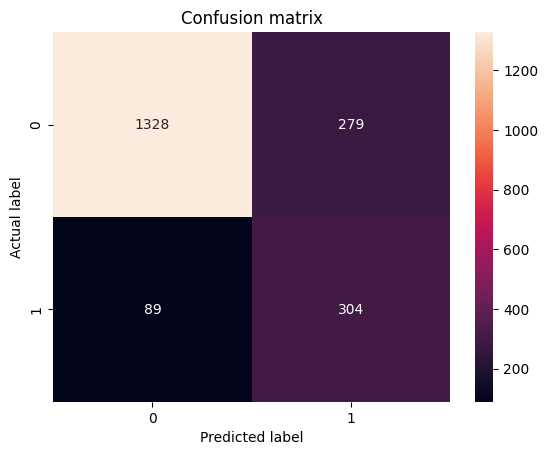

In [96]:
confusion = confusion_matrix(y_test, y_pred_rf.round())
sns.heatmap(confusion, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [97]:
print(classification_report(y_test, y_pred_rf.round()))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1607
           1       0.52      0.77      0.62       393

    accuracy                           0.82      2000
   macro avg       0.73      0.80      0.75      2000
weighted avg       0.86      0.82      0.83      2000



##Feature importance

In [98]:
importances = gs_rf.best_estimator_.named_steps['RandomForest'].feature_importances_

In [99]:
features = gs_rf.best_estimator_.named_steps['OneHotEncoder_transformer'].get_feature_names_out()

In [100]:
df_importances = pd.DataFrame({'feature': features, 'importance': importances})
df_importances.sort_values(by='importance', ascending=False, inplace=True)
df_importances

,feature,importance
5,remainder__Age,0.433958
6,remainder__NumOfProducts,0.303309
4,remainder__Balance,0.090479
3,onehotencoder__IsActiveMember_1,0.080038
0,onehotencoder__Geography_Germany,0.064481
2,onehotencoder__Gender_Male,0.022911
1,onehotencoder__Geography_Spain,0.004825


#Modelo CatBoost

In [101]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


In [102]:
import catboost

##Modelo

In [103]:
#Calcula os pesos das classes para anular o impacto negativo do desbalanceamento:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [104]:
cat = catboost.CatBoostClassifier(early_stopping_rounds=10,
                                  verbose=50,
                                  class_weights=class_weights
                                  )

##Pipeline

In [105]:
#Criação pipeline XGBoost:
pipe_cat = Pipeline([
    ('OneHotEncoder_transformer', transformer),
    ('RobustScaler', scaler),
    ('CatBoost', cat)
])

##Treino

In [106]:
pipe_cat.fit(X_train_rf, y_train)

Learning rate set to 0.025035
0:	learn: 0.6810082	total: 51.7ms	remaining: 51.6s
50:	learn: 0.4771004	total: 211ms	remaining: 3.93s
100:	learn: 0.4447446	total: 524ms	remaining: 4.66s
150:	learn: 0.4322290	total: 768ms	remaining: 4.32s
200:	learn: 0.4243826	total: 910ms	remaining: 3.62s
250:	learn: 0.4186507	total: 1.05s	remaining: 3.14s
300:	learn: 0.4138137	total: 1.2s	remaining: 2.78s
350:	learn: 0.4090292	total: 1.34s	remaining: 2.48s
400:	learn: 0.4033108	total: 1.51s	remaining: 2.26s
450:	learn: 0.3979675	total: 1.8s	remaining: 2.2s
500:	learn: 0.3928097	total: 2.01s	remaining: 2s
550:	learn: 0.3884381	total: 2.17s	remaining: 1.76s
600:	learn: 0.3841987	total: 2.42s	remaining: 1.6s
650:	learn: 0.3799370	total: 2.72s	remaining: 1.46s
700:	learn: 0.3761751	total: 2.97s	remaining: 1.26s
750:	learn: 0.3722494	total: 3.3s	remaining: 1.09s
800:	learn: 0.3688147	total: 3.58s	remaining: 889ms
850:	learn: 0.3654952	total: 3.83s	remaining: 670ms
900:	learn: 0.3622442	total: 4.28s	remaining

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('OneHotEncoder_transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Geography', 'Gender',
                                                   'IsActiveMember'])])),
                ('RobustScaler', RobustScaler(with_centering=False)),
                ('CatBoost',
                 <catboost.core.CatBoostClassifier object at 0x7ce02fa45780>)])

##Validação desempenho

Learning rate set to 0.021055
0:	learn: 0.6830746	total: 3.89ms	remaining: 3.88s
50:	learn: 0.4918752	total: 146ms	remaining: 2.72s
100:	learn: 0.4544843	total: 295ms	remaining: 2.62s
150:	learn: 0.4380307	total: 423ms	remaining: 2.38s
200:	learn: 0.4285575	total: 532ms	remaining: 2.11s
250:	learn: 0.4215066	total: 645ms	remaining: 1.93s
300:	learn: 0.4155271	total: 793ms	remaining: 1.84s
350:	learn: 0.4101668	total: 1.02s	remaining: 1.89s
400:	learn: 0.4051323	total: 1.18s	remaining: 1.76s
450:	learn: 0.3996269	total: 1.31s	remaining: 1.6s
500:	learn: 0.3935034	total: 1.56s	remaining: 1.55s
550:	learn: 0.3878688	total: 2.05s	remaining: 1.67s
600:	learn: 0.3825038	total: 2.53s	remaining: 1.68s
650:	learn: 0.3770148	total: 3.05s	remaining: 1.64s
700:	learn: 0.3714811	total: 3.57s	remaining: 1.52s
750:	learn: 0.3668262	total: 4.07s	remaining: 1.35s
800:	learn: 0.3620232	total: 4.57s	remaining: 1.14s
850:	learn: 0.3574890	total: 5.13s	remaining: 899ms
900:	learn: 0.3532979	total: 5.84s	re

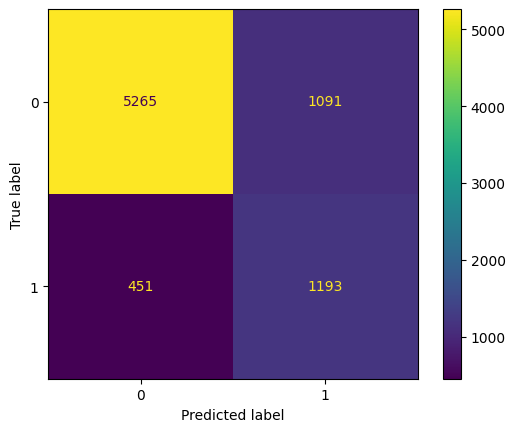


Recall: 73.0%

Classification report:


              precision    recall  f1-score   support

           0       0.92      0.83      0.87      6356
           1       0.52      0.73      0.61      1644

    accuracy                           0.81      8000
   macro avg       0.72      0.78      0.74      8000
weighted avg       0.84      0.81      0.82      8000


Curva ROC:



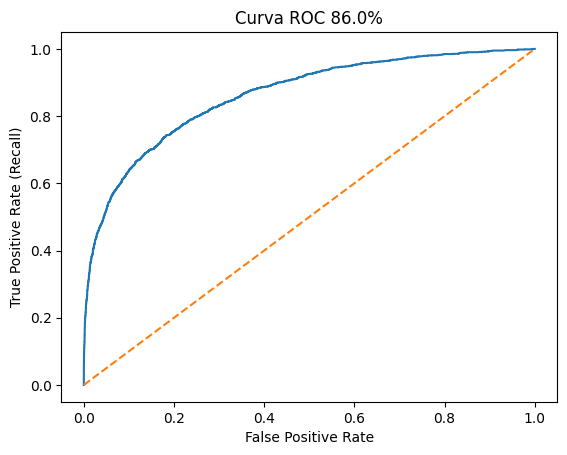

In [107]:
print_metrics(pipe_cat)

##GridSearch

In [108]:
params_cat = {
    'CatBoost__iterations': [80, 100, 120],
    'CatBoost__learning_rate': [0.04, 0.06, 0.08],
    'CatBoost__depth': [4, 6, 8],
}

In [109]:
gs_cat = GridSearchCV(pipe_cat, params_cat, cv=skf, scoring='recall', refit=True, n_jobs=-1)

In [ ]:
gs_cat.fit(X_train_rf, y_train)

In [111]:
gs_cat.best_params_

{'CatBoost__depth': 6,
 'CatBoost__iterations': 100,
 'CatBoost__learning_rate': 0.06}

In [112]:
gs_cat.best_score_

0.7627737226277372

##Validação desempenho GridSearch

0:	learn: 0.6746861	total: 1.37ms	remaining: 135ms
50:	learn: 0.4610017	total: 64.2ms	remaining: 61.7ms
99:	learn: 0.4378111	total: 127ms	remaining: 0us
0:	learn: 0.6743291	total: 1.33ms	remaining: 132ms
50:	learn: 0.4533218	total: 63.5ms	remaining: 61ms
99:	learn: 0.4267334	total: 131ms	remaining: 0us
0:	learn: 0.6745528	total: 1.4ms	remaining: 138ms
50:	learn: 0.4583235	total: 67ms	remaining: 64.4ms
99:	learn: 0.4324311	total: 135ms	remaining: 0us
0:	learn: 0.6746861	total: 1.34ms	remaining: 132ms
50:	learn: 0.4610017	total: 67ms	remaining: 64.4ms
99:	learn: 0.4378111	total: 127ms	remaining: 0us
0:	learn: 0.6743291	total: 8.94ms	remaining: 885ms
50:	learn: 0.4533218	total: 96.1ms	remaining: 92.3ms
99:	learn: 0.4267334	total: 160ms	remaining: 0us
0:	learn: 0.6745528	total: 1.6ms	remaining: 159ms
50:	learn: 0.4583235	total: 66.5ms	remaining: 63.8ms
99:	learn: 0.4324311	total: 127ms	remaining: 0us
0:	learn: 0.6746861	total: 1.43ms	remaining: 142ms
50:	learn: 0.4610017	total: 74.1ms	rema

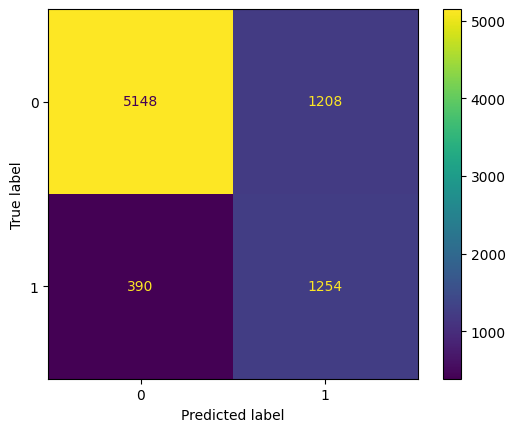


Recall: 76.0%

Classification report:


              precision    recall  f1-score   support

           0       0.93      0.81      0.87      6356
           1       0.51      0.76      0.61      1644

    accuracy                           0.80      8000
   macro avg       0.72      0.79      0.74      8000
weighted avg       0.84      0.80      0.81      8000


Curva ROC:



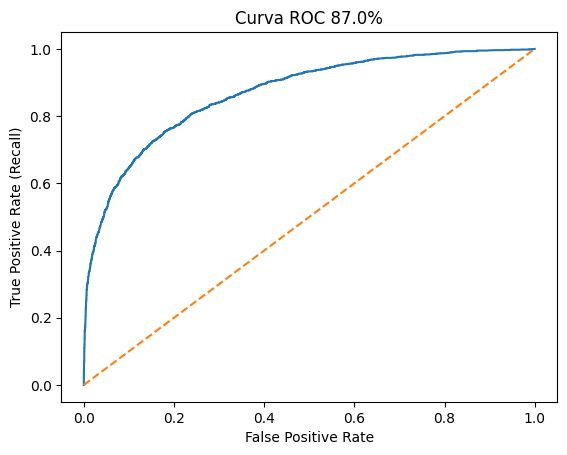

In [113]:
print_metrics(gs_cat.best_estimator_)

##Conjunto de teste

In [114]:
y_pred_cat = gs_cat.predict(X_test)

Text(0.5, 23.52222222222222, 'Predicted label')

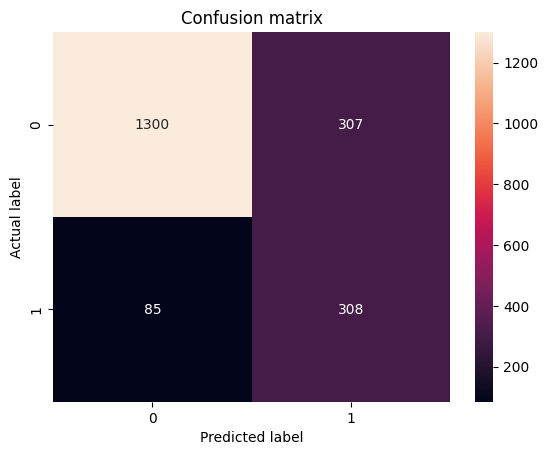

In [115]:
confusion = confusion_matrix(y_test, y_pred_cat.round())
sns.heatmap(confusion, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [116]:
print(classification_report(y_test, y_pred_cat.round()))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1607
           1       0.50      0.78      0.61       393

    accuracy                           0.80      2000
   macro avg       0.72      0.80      0.74      2000
weighted avg       0.85      0.80      0.82      2000



#Modelo Voting Classifier

In [117]:
from sklearn.ensemble import VotingClassifier

In [118]:
votacao = VotingClassifier(estimators=[
    ('LogisticRegression', pipe_log),
    ('RandomForest', gs_rf.best_estimator_),
    ('CatBoost', gs_cat.best_estimator_)
],
voting='soft',
)

In [119]:
votacao.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


0:	learn: 0.6741991	total: 2.53ms	remaining: 250ms
50:	learn: 0.4569926	total: 242ms	remaining: 232ms
99:	learn: 0.4348807	total: 461ms	remaining: 0us


VotingClassifier(estimators=[('LogisticRegression',
                              Pipeline(steps=[('Transform_quant_to_cat',
                                               <__main__.QuantitativeToQualitative object at 0x7ce02ac12500>),
                                              ('OneHotEncoder',
                                               OneHotEncoder(drop='first',
                                                             handle_unknown='ignore',
                                                             sparse_output=False)),
                                              ('Balanceamento', NearMiss()),
                                              ('LogisticRegression',
                                               LogisticRegression())])),
                             ('RandomForest',
                              Pipeline(steps=...
                              Pipeline(steps=[('OneHotEncoder_transformer',
                                               ColumnTransformer(remainder='passthrough',
                                                                 sparse_threshold=0,
                                                                 transformers=[('onehotencoder',
                                                                                OneHotEncoder(drop='first',
                                                                                              handle_unknown='ignore',
                                                                                              sparse_output=False),
                                                                                ['Geography',
                                                                                 'Gender',
                                                                                 'IsActiveMember'])])),
                                              ('RobustScaler',
                                               RobustScaler(with_centering=False)),
                                              ('CatBoost',
                                               <catboost.core.CatBoostClassifier object at 0x7ce0587bfd00>)]))],
                 voting='soft')

##Validação desempenho

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


0:	learn: 0.6746861	total: 2.02ms	remaining: 200ms
50:	learn: 0.4610017	total: 125ms	remaining: 120ms
99:	learn: 0.4378111	total: 239ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


0:	learn: 0.6743291	total: 1.85ms	remaining: 183ms
50:	learn: 0.4533218	total: 99.9ms	remaining: 96ms
99:	learn: 0.4267334	total: 239ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEsti

0:	learn: 0.6745528	total: 1.33ms	remaining: 132ms
50:	learn: 0.4583235	total: 65.3ms	remaining: 62.8ms
99:	learn: 0.4324311	total: 127ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


0:	learn: 0.6746861	total: 1.3ms	remaining: 129ms
50:	learn: 0.4610017	total: 63.1ms	remaining: 60.6ms
99:	learn: 0.4378111	total: 124ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


0:	learn: 0.6743291	total: 1.32ms	remaining: 131ms
50:	learn: 0.4533218	total: 64.4ms	remaining: 61.8ms
99:	learn: 0.4267334	total: 142ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_ta

0:	learn: 0.6745528	total: 1.4ms	remaining: 138ms
50:	learn: 0.4583235	total: 64.6ms	remaining: 62.1ms
99:	learn: 0.4324311	total: 127ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


0:	learn: 0.6746861	total: 1.49ms	remaining: 148ms
50:	learn: 0.4610017	total: 65.5ms	remaining: 63ms
99:	learn: 0.4378111	total: 129ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


0:	learn: 0.6743291	total: 1.41ms	remaining: 139ms
50:	learn: 0.4533218	total: 65.3ms	remaining: 62.7ms
99:	learn: 0.4267334	total: 126ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_ta

0:	learn: 0.6745528	total: 1.36ms	remaining: 135ms
50:	learn: 0.4583235	total: 64.3ms	remaining: 61.8ms
99:	learn: 0.4324311	total: 125ms	remaining: 0us

Intervalos de confiança:

Intervalo de confiança test_accuracy: [0.7948905929836091, 0.8211087386828285]
Intervalo de confiança test_precision: [0.49936905603088494, 0.5495001144049907]
Intervalo de confiança test_recall: [0.6948940893664498, 0.7321132099036233]
Intervalo de confiança test_roc_auc: [0.851285039532604, 0.8721962096090253]

Matriz de confusão:



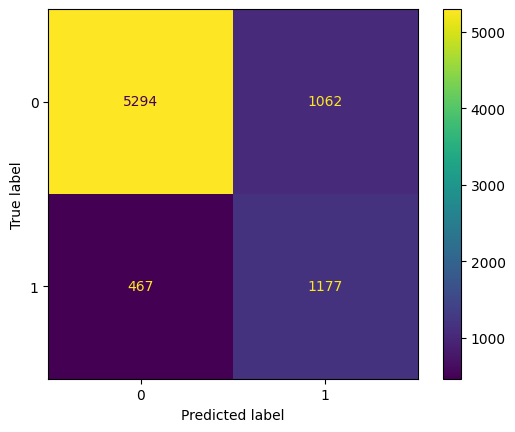


Recall: 72.0%

Classification report:


              precision    recall  f1-score   support

           0       0.92      0.83      0.87      6356
           1       0.53      0.72      0.61      1644

    accuracy                           0.81      8000
   macro avg       0.72      0.77      0.74      8000
weighted avg       0.84      0.81      0.82      8000


Curva ROC:



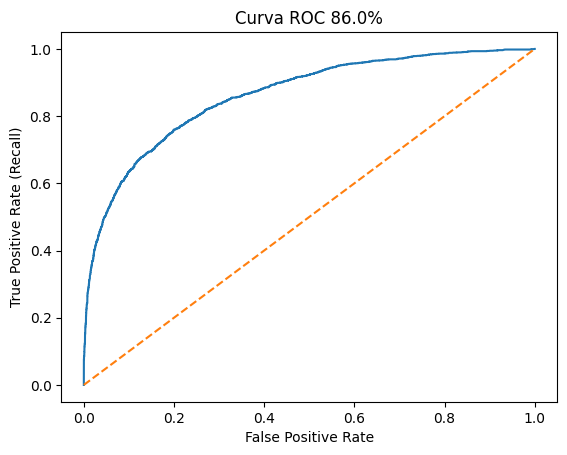

In [120]:
print_metrics(votacao)

##Conjunto de teste

In [121]:
y_pred_votacao = votacao.predict(X_test)

Text(0.5, 23.52222222222222, 'Predicted label')

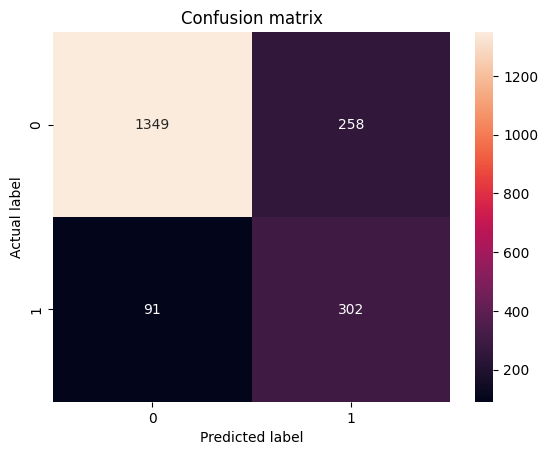

In [122]:
confusion = confusion_matrix(y_test, y_pred_votacao.round())
sns.heatmap(confusion, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [123]:
print(classification_report(y_test, y_pred_votacao.round()))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1607
           1       0.54      0.77      0.63       393

    accuracy                           0.83      2000
   macro avg       0.74      0.80      0.76      2000
weighted avg       0.86      0.83      0.84      2000



#Modelo StackingCV

In [124]:
from sklearn.ensemble import StackingClassifier

In [125]:
modelos_base = {
    'LogisticRegression': pipe_log,
    'RandomForest': gs_rf.best_estimator_,
    'CatBoost': gs_cat.best_estimator_
}

In [126]:
stacking = StackingClassifier(estimators=list(modelos_base.items()), final_estimator=LogisticRegression())

In [127]:
stacking.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


0:	learn: 0.6741991	total: 2.33ms	remaining: 231ms
50:	learn: 0.4569926	total: 99ms	remaining: 95.1ms
99:	learn: 0.4348807	total: 190ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

0:	learn: 0.6741848	total: 2.4ms	remaining: 238ms
50:	learn: 0.4558240	total: 161ms	remaining: 155ms
99:	learn: 0.4332442	total: 287ms	remaining: 0us
0:	learn: 0.6743189	total: 4.97ms	remaining: 492ms
50:	learn: 0.4593474	total: 149ms	remaining: 144ms
99:	learn: 0.4352128	total: 304ms	remaining: 0us
0:	learn: 0.6752434	total: 4.44ms	remaining: 439ms
50:	learn: 0.4609585	total: 194ms	remaining: 186ms
99:	learn: 0.4367859	total: 330ms	remaining: 0us
0:	learn: 0.6743382	total: 5.51ms	remaining: 545ms
50:	learn: 0.4558717	total: 157ms	remaining: 150ms
99:	learn: 0.4309675	total: 350ms	remaining: 0us
0:	learn: 0.6747993	total: 1.51ms	remaining: 150ms
50:	learn: 0.4534976	total: 72ms	remaining: 69.2ms
99:	learn: 0.4300534	total: 139ms	remaining: 0us


StackingClassifier(estimators=[('LogisticRegression',
                                Pipeline(steps=[('Transform_quant_to_cat',
                                                 <__main__.QuantitativeToQualitative object at 0x7ce02ac12500>),
                                                ('OneHotEncoder',
                                                 OneHotEncoder(drop='first',
                                                               handle_unknown='ignore',
                                                               sparse_output=False)),
                                                ('Balanceamento', NearMiss()),
                                                ('LogisticRegression',
                                                 LogisticRegression())])),
                               ('RandomForest',
                                Pipeline(step...
                                                 ColumnTransformer(remainder='passthrough',
                                                                   sparse_threshold=0,
                                                                   transformers=[('onehotencoder',
                                                                                  OneHotEncoder(drop='first',
                                                                                                handle_unknown='ignore',
                                                                                                sparse_output=False),
                                                                                  ['Geography',
                                                                                   'Gender',
                                                                                   'IsActiveMember'])])),
                                                ('RobustScaler',
                                                 RobustScaler(with_centering=False)),
                                                ('CatBoost',
                                                 <catboost.core.CatBoostClassifier object at 0x7ce0587bfd00>)]))],
                   final_estimator=LogisticRegression())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


0:	learn: 0.6746861	total: 1.79ms	remaining: 177ms
50:	learn: 0.4610017	total: 64ms	remaining: 61.5ms
99:	learn: 0.4378111	total: 125ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

0:	learn: 0.6746284	total: 1.33ms	remaining: 132ms
50:	learn: 0.4600022	total: 69.8ms	remaining: 67.1ms
99:	learn: 0.4354820	total: 122ms	remaining: 0us
0:	learn: 0.6746543	total: 1.17ms	remaining: 116ms
50:	learn: 0.4576821	total: 59.6ms	remaining: 57.3ms
99:	learn: 0.4301342	total: 117ms	remaining: 0us
0:	learn: 0.6758672	total: 1.21ms	remaining: 120ms
50:	learn: 0.4661260	total: 58.5ms	remaining: 56.2ms
99:	learn: 0.4381994	total: 119ms	remaining: 0us
0:	learn: 0.6745052	total: 1.2ms	remaining: 119ms
50:	learn: 0.4624306	total: 56.9ms	remaining: 54.7ms
99:	learn: 0.4394562	total: 111ms	remaining: 0us
0:	learn: 0.6746221	total: 1.26ms	remaining: 125ms
50:	learn: 0.4575923	total: 57.5ms	remaining: 55.2ms
99:	learn: 0.4315237	total: 112ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


0:	learn: 0.6743291	total: 1.43ms	remaining: 141ms
50:	learn: 0.4533218	total: 67.4ms	remaining: 64.7ms
99:	learn: 0.4267334	total: 129ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

0:	learn: 0.6747467	total: 1.22ms	remaining: 121ms
50:	learn: 0.4506061	total: 57.7ms	remaining: 55.5ms
99:	learn: 0.4217284	total: 112ms	remaining: 0us
0:	learn: 0.6746608	total: 1.18ms	remaining: 117ms
50:	learn: 0.4567078	total: 61.2ms	remaining: 58.8ms
99:	learn: 0.4308500	total: 115ms	remaining: 0us
0:	learn: 0.6750410	total: 1.36ms	remaining: 135ms
50:	learn: 0.4599274	total: 55.5ms	remaining: 53.3ms
99:	learn: 0.4287220	total: 115ms	remaining: 0us
0:	learn: 0.6743559	total: 1.2ms	remaining: 119ms
50:	learn: 0.4472440	total: 58.9ms	remaining: 56.6ms
99:	learn: 0.4178859	total: 131ms	remaining: 0us
0:	learn: 0.6744745	total: 1.23ms	remaining: 122ms
50:	learn: 0.4498507	total: 57.7ms	remaining: 55.4ms
99:	learn: 0.4211891	total: 113ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEsti

0:	learn: 0.6745528	total: 1.63ms	remaining: 161ms
50:	learn: 0.4583235	total: 146ms	remaining: 140ms
99:	learn: 0.4324311	total: 320ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

0:	learn: 0.6745779	total: 1.68ms	remaining: 167ms
50:	learn: 0.4563783	total: 78.7ms	remaining: 75.6ms
99:	learn: 0.4312419	total: 224ms	remaining: 0us
0:	learn: 0.6753546	total: 1.69ms	remaining: 167ms
50:	learn: 0.4594408	total: 99.1ms	remaining: 95.2ms
99:	learn: 0.4323706	total: 155ms	remaining: 0us
0:	learn: 0.6748259	total: 1.23ms	remaining: 122ms
50:	learn: 0.4591805	total: 70.3ms	remaining: 67.5ms
99:	learn: 0.4313578	total: 144ms	remaining: 0us
0:	learn: 0.6753439	total: 1.27ms	remaining: 126ms
50:	learn: 0.4577343	total: 57.1ms	remaining: 54.9ms
99:	learn: 0.4297105	total: 110ms	remaining: 0us
0:	learn: 0.6752253	total: 1.22ms	remaining: 121ms
50:	learn: 0.4531046	total: 61.1ms	remaining: 58.7ms
99:	learn: 0.4255212	total: 114ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


0:	learn: 0.6746861	total: 1.36ms	remaining: 135ms
50:	learn: 0.4610017	total: 67.8ms	remaining: 65.2ms
99:	learn: 0.4378111	total: 127ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

0:	learn: 0.6746284	total: 1.24ms	remaining: 122ms
50:	learn: 0.4600022	total: 55.3ms	remaining: 53.2ms
99:	learn: 0.4354820	total: 108ms	remaining: 0us
0:	learn: 0.6746543	total: 1.27ms	remaining: 126ms
50:	learn: 0.4576821	total: 60.3ms	remaining: 57.9ms
99:	learn: 0.4301342	total: 117ms	remaining: 0us
0:	learn: 0.6758672	total: 1.26ms	remaining: 125ms
50:	learn: 0.4661260	total: 64.3ms	remaining: 61.8ms
99:	learn: 0.4381994	total: 124ms	remaining: 0us
0:	learn: 0.6745052	total: 1.27ms	remaining: 126ms
50:	learn: 0.4624306	total: 57.8ms	remaining: 55.5ms
99:	learn: 0.4394562	total: 112ms	remaining: 0us
0:	learn: 0.6746221	total: 1.19ms	remaining: 118ms
50:	learn: 0.4575923	total: 56.9ms	remaining: 54.7ms
99:	learn: 0.4315237	total: 112ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


0:	learn: 0.6743291	total: 1.4ms	remaining: 139ms
50:	learn: 0.4533218	total: 67.7ms	remaining: 65ms
99:	learn: 0.4267334	total: 130ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

0:	learn: 0.6747467	total: 1.26ms	remaining: 125ms
50:	learn: 0.4506061	total: 56.1ms	remaining: 53.9ms
99:	learn: 0.4217284	total: 112ms	remaining: 0us
0:	learn: 0.6746608	total: 1.29ms	remaining: 128ms
50:	learn: 0.4567078	total: 59.2ms	remaining: 56.9ms
99:	learn: 0.4308500	total: 114ms	remaining: 0us
0:	learn: 0.6750410	total: 1.23ms	remaining: 121ms
50:	learn: 0.4599274	total: 55.1ms	remaining: 53ms
99:	learn: 0.4287220	total: 112ms	remaining: 0us
0:	learn: 0.6743559	total: 1.24ms	remaining: 123ms
50:	learn: 0.4472440	total: 56.8ms	remaining: 54.6ms
99:	learn: 0.4178859	total: 111ms	remaining: 0us
0:	learn: 0.6744745	total: 1.55ms	remaining: 153ms
50:	learn: 0.4498507	total: 56ms	remaining: 53.8ms
99:	learn: 0.4211891	total: 112ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_ta

0:	learn: 0.6745528	total: 5.89ms	remaining: 583ms
50:	learn: 0.4583235	total: 182ms	remaining: 175ms
99:	learn: 0.4324311	total: 283ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

0:	learn: 0.6745779	total: 3.9ms	remaining: 387ms
50:	learn: 0.4563783	total: 109ms	remaining: 105ms
99:	learn: 0.4312419	total: 233ms	remaining: 0us
0:	learn: 0.6753546	total: 3.07ms	remaining: 304ms
50:	learn: 0.4594408	total: 118ms	remaining: 113ms
99:	learn: 0.4323706	total: 240ms	remaining: 0us
0:	learn: 0.6748259	total: 1.2ms	remaining: 118ms
50:	learn: 0.4591805	total: 128ms	remaining: 123ms
99:	learn: 0.4313578	total: 331ms	remaining: 0us
0:	learn: 0.6753439	total: 4.29ms	remaining: 425ms
50:	learn: 0.4577343	total: 197ms	remaining: 189ms
99:	learn: 0.4297105	total: 361ms	remaining: 0us
0:	learn: 0.6752253	total: 1.23ms	remaining: 122ms
50:	learn: 0.4531046	total: 72.3ms	remaining: 69.5ms
99:	learn: 0.4255212	total: 252ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


0:	learn: 0.6746861	total: 1.38ms	remaining: 136ms
50:	learn: 0.4610017	total: 143ms	remaining: 137ms
99:	learn: 0.4378111	total: 250ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

0:	learn: 0.6746284	total: 3.34ms	remaining: 330ms
50:	learn: 0.4600022	total: 305ms	remaining: 293ms
99:	learn: 0.4354820	total: 481ms	remaining: 0us
0:	learn: 0.6746543	total: 1.66ms	remaining: 164ms
50:	learn: 0.4576821	total: 210ms	remaining: 202ms
99:	learn: 0.4301342	total: 360ms	remaining: 0us
0:	learn: 0.6758672	total: 8.76ms	remaining: 867ms
50:	learn: 0.4661260	total: 224ms	remaining: 216ms
99:	learn: 0.4381994	total: 520ms	remaining: 0us
0:	learn: 0.6745052	total: 6.6ms	remaining: 653ms
50:	learn: 0.4624306	total: 229ms	remaining: 220ms
99:	learn: 0.4394562	total: 433ms	remaining: 0us
0:	learn: 0.6746221	total: 11.2ms	remaining: 1.11s
50:	learn: 0.4575923	total: 281ms	remaining: 270ms
99:	learn: 0.4315237	total: 447ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


0:	learn: 0.6743291	total: 1.4ms	remaining: 138ms
50:	learn: 0.4533218	total: 63.8ms	remaining: 61.3ms
99:	learn: 0.4267334	total: 124ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

0:	learn: 0.6747467	total: 1.31ms	remaining: 130ms
50:	learn: 0.4506061	total: 57.4ms	remaining: 55.2ms
99:	learn: 0.4217284	total: 127ms	remaining: 0us
0:	learn: 0.6746608	total: 1.21ms	remaining: 120ms
50:	learn: 0.4567078	total: 59.1ms	remaining: 56.8ms
99:	learn: 0.4308500	total: 114ms	remaining: 0us
0:	learn: 0.6750410	total: 1.65ms	remaining: 164ms
50:	learn: 0.4599274	total: 56.1ms	remaining: 53.9ms
99:	learn: 0.4287220	total: 118ms	remaining: 0us
0:	learn: 0.6743559	total: 1.23ms	remaining: 122ms
50:	learn: 0.4472440	total: 56.1ms	remaining: 53.9ms
99:	learn: 0.4178859	total: 113ms	remaining: 0us
0:	learn: 0.6744745	total: 1.25ms	remaining: 123ms
50:	learn: 0.4498507	total: 57.4ms	remaining: 55.2ms
99:	learn: 0.4211891	total: 113ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_ta

0:	learn: 0.6745528	total: 1.38ms	remaining: 137ms
50:	learn: 0.4583235	total: 67.1ms	remaining: 64.5ms
99:	learn: 0.4324311	total: 128ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

0:	learn: 0.6745779	total: 1.35ms	remaining: 133ms
50:	learn: 0.4563783	total: 126ms	remaining: 121ms
99:	learn: 0.4312419	total: 223ms	remaining: 0us
0:	learn: 0.6753546	total: 1.71ms	remaining: 170ms
50:	learn: 0.4594408	total: 65.4ms	remaining: 62.9ms
99:	learn: 0.4323706	total: 163ms	remaining: 0us
0:	learn: 0.6748259	total: 1.58ms	remaining: 157ms
50:	learn: 0.4591805	total: 130ms	remaining: 125ms
99:	learn: 0.4313578	total: 255ms	remaining: 0us
0:	learn: 0.6753439	total: 1.62ms	remaining: 160ms
50:	learn: 0.4577343	total: 153ms	remaining: 147ms
99:	learn: 0.4297105	total: 300ms	remaining: 0us
0:	learn: 0.6752253	total: 1.2ms	remaining: 119ms
50:	learn: 0.4531046	total: 56.1ms	remaining: 53.9ms
99:	learn: 0.4255212	total: 115ms	remaining: 0us

Intervalos de confiança:

Intervalo de confiança test_accuracy: [0.8539210629580329, 0.8673299284549869]
Intervalo de confiança test_precision: [0.6793470081297375, 0.7479622009450839]
Intervalo de confiança test_recall: [0.5304370551114259,

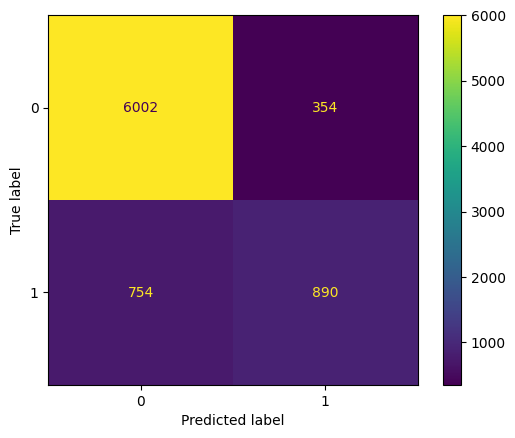


Recall: 54.0%

Classification report:


              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6356
           1       0.72      0.54      0.62      1644

    accuracy                           0.86      8000
   macro avg       0.80      0.74      0.77      8000
weighted avg       0.85      0.86      0.85      8000


Curva ROC:



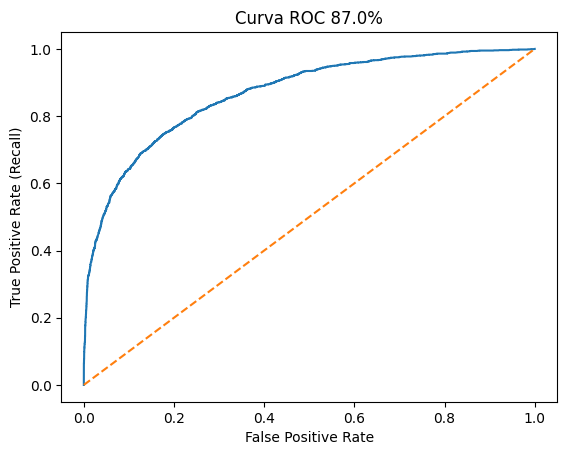

In [128]:
print_metrics(stacking)

In [129]:
y_pred_stacking = stacking.predict(X_test)

Text(0.5, 23.52222222222222, 'Predicted label')

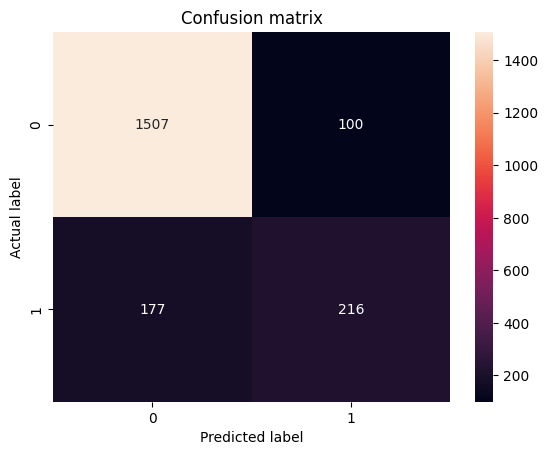

In [130]:
confusion = confusion_matrix(y_test, y_pred_stacking.round())
sns.heatmap(confusion, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Modelo final vencedor

Considerando o critério de desempendo Recall, o melhor modelo seria o de regressão logística

In [164]:
votacao

VotingClassifier(estimators=[('LogisticRegression',
                              Pipeline(steps=[('Transform_quant_to_cat',
                                               <__main__.QuantitativeToQualitative object at 0x7ce02ac12500>),
                                              ('OneHotEncoder',
                                               OneHotEncoder(drop='first',
                                                             handle_unknown='ignore',
                                                             sparse_output=False)),
                                              ('Balanceamento', NearMiss()),
                                              ('LogisticRegression',
                                               LogisticRegression())])),
                             ('RandomForest',
                              Pipeline(steps=...
                              Pipeline(steps=[('OneHotEncoder_transformer',
                                               ColumnTransformer(remainder='passthrough',
                                                                 sparse_threshold=0,
                                                                 transformers=[('onehotencoder',
                                                                                OneHotEncoder(drop='first',
                                                                                              handle_unknown='ignore',
                                                                                              sparse_output=False),
                                                                                ['Geography',
                                                                                 'Gender',
                                                                                 'IsActiveMember'])])),
                                              ('RobustScaler',
                                               RobustScaler(with_centering=False)),
                                              ('CatBoost',
                                               <catboost.core.CatBoostClassifier object at 0x7ce0587bfd00>)]))],
                 voting='soft')

## Importando DataSet de teste:

In [132]:
#https://drive.google.com/file/d/1FHueIN-97dmb4eBfVpWF8CEfMcwLLazi/view?usp=drive_link
url_test = 'https://drive.google.com/uc?id=1FHueIN-97dmb4eBfVpWF8CEfMcwLLazi'
output_test = 'abandono_clientes_teste.csv'

In [133]:
gdown.download(url_test, output_test, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1FHueIN-97dmb4eBfVpWF8CEfMcwLLazi
To: /content/abandono_clientes_teste.csv
100%|██████████| 67.5k/67.5k [00:00<00:00, 2.56MB/s]


'abandono_clientes_teste.csv'

In [134]:
df_test = pd.read_csv('abandono_clientes_teste.csv', delimiter=';')

In [135]:
df_test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,10001,15798485,Copley,565,France,Male,31,1,0.00,1,0,1,20443.08
1,10002,15588959,T'ang,569,France,Male,34,4,0.00,1,0,1,4045.90
2,10003,15624896,Ku,669,France,Female,20,7,0.00,2,1,0,128838.67
3,10004,15639629,McConnan,694,France,Male,39,4,173255.48,1,1,1,81293.10
4,10005,15638852,Ts'ui,504,Spain,Male,28,10,109291.36,1,1,1,187593.15


In [136]:
row_number = df_test['RowNumber'].copy()

## Feature selection

In [137]:
df_test = df_test[selected_features]

In [138]:
df_test.head()

,Balance,Age,NumOfProducts,Geography,Gender,IsActiveMember
0,0.00,31,1,France,Male,1
1,0.00,34,1,France,Male,1
2,0.00,20,2,France,Female,0
3,173255.48,39,1,France,Male,1
4,109291.36,28,1,Spain,Male,1


##Transformando quantitativas em categóricas

In [159]:
y_pred_test = votacao.predict(df_test)

In [160]:
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [161]:
abandono_teste = pd.DataFrame({'RowNumber': row_number, 'predictedValues': y_pred_test})
abandono_teste.head()

,RowNumber,predictedValues
0,10001,0
1,10002,0
2,10003,0
3,10004,0
4,10005,0


In [162]:
abandono_teste['predictedValues'].value_counts()

,count
predictedValues,
0,702
1,298


In [163]:
abandono_teste.to_csv('abandono_teste.csv', index=False)